#### First, Let's Install All impostant libararies for our analysis

In [65]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 1. Comparing Compact SUVs

Consumer Reports evaluates products for consumers. The file CompactSUV contains the data for 15 compact sports util- ity vehicles (SUVs) from the 2018 model line (Consumer Reports website):
<br>
<br>
Make—manufacturer
<br>
Model—name of the model
<br>
Overall score—awarded based on a variety of measures, including those in this data set 
<br>
Recommended—Consumer Reports recommends the vehicle or not
<br>
Owner satisfaction—satisfaction on a five-point scale based on the percentage of owners who would purchase the vehicle again (– –, –, 0, +, ++)
<br>
Overall miles per gallon—miles per gallon achieved in a 150-mile test trip.
<br>
Acceleration (0–60 sec)—time in seconds it takes vehicle to reach 60 miles per hour from a standstill with the engine idling.

a. How many variables are in the data set?
<br>
b. Which of the variables are categorical, and which are quantitative?
<br>
c. What percentage of these 15 vehicles are recommended?
<br>
d. What is the average of the overall miles per gallon across all 15 vehicles?
<br>
e. For owner satisfaction, construct a bar chart similar
<br>
f. Show the frequency distribution for acceleration using the following intervals: 7.0– 7.9, 8.0–8.9, 9.0–9.9, and 10.0–10.9. Construct a histogram 
<br>

#### First Let's panda library and read the data set. And keep [d,i,t,c,h] describe ,info, table, col_names and head ready for data view.

In [183]:
suv = pd.read_excel("CompactSUV.xlsx")

d = suv.describe()
i = suv.info
t = suv.groupby("Make").sum()
c = suv.columns
h = suv.head()
h

,Make,Model,Overall Score,Recommended,Owner Satisfaction,Overall Miles Per Gallon,Acceleration (0-60) Sec
0,Subaru,Forester,84,Yes,+,26,8.7
1,Honda,CRV,83,Yes,++,27,8.6
2,Toyota,Rav4,81,Yes,++,24,9.3
3,Nissan,Rogue,73,Yes,+,24,9.5
4,Mazda,CX-5,71,Yes,++,24,8.6


#### A. How many variables are in the data set?

In [184]:
print("Total variables in the data set are" , suv.shape[0])

Total variables in the data set are 15


#### B. Which of the variables are categorical, and which are quantitative?

In [185]:
#Dont confuse Column with integer data type as quantative variables.
#Integers column can be qualitative and float can be quantative.

h

#1. Make, Model,recommend, Owner Satisfaction columns are qualatative.
#2. Overall Miles Per Gallon,Score, Acceleration (0-60) Sec are quantative columns.

,Make,Model,Overall Score,Recommended,Owner Satisfaction,Overall Miles Per Gallon,Acceleration (0-60) Sec
0,Subaru,Forester,84,Yes,+,26,8.7
1,Honda,CRV,83,Yes,++,27,8.6
2,Toyota,Rav4,81,Yes,++,24,9.3
3,Nissan,Rogue,73,Yes,+,24,9.5
4,Mazda,CX-5,71,Yes,++,24,8.6


#### C. What percentage of these 15 vehicles are recommended?

In [186]:
#This question is basically about finding ratio with in a columns with two values.

recommened_cars = suv[suv["Recommended"].isin(["Yes"])].shape[0]
total_Cars = suv.shape[0]

recommened_to_total_Ratio = recommened_cars/total_Cars

#Lets round the number upto two decimal percentage
print(round(recommened_to_total_Ratio,4)*100,"%")

46.67 %


#### D. What is the average of the overall miles per gallon across all 15 vehicles?

In [187]:
suv["Overall Miles Per Gallon"].mean()

24.4

#### E. For owner satisfaction, construct a bar chart.

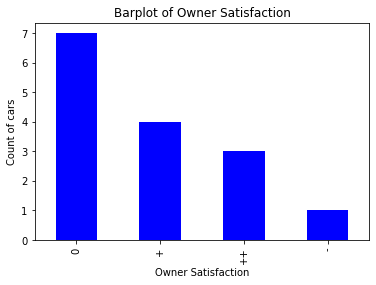

In [188]:
#First Lets group a qualitativ column whihc want to place on x axis and see its frequency distribution of the column
os_group = suv.groupby("Owner Satisfaction")
os_group.size()

#Now lets see all other columns count w.r.t this os_group. Obvisouly count for each column will come same.
os_group.count()

#Now lets see first sum and then average of each column w.r.t os_group 
os_group.sum()
os_group.mean()

#If we want to see just one column count or sum or mean w.r.t to os_group just put column name next to command.
os_group.sum()["Acceleration (0-60) Sec"]
os_group.mean()["Overall Miles Per Gallon"]

#Now we can visulize this group values and respective stat value on bar chart. here we are using count in this problem
os_bar = os_group.count()["Overall Score"].plot(kind = "bar", facecolor = "b") #Try sum or mean instead of count

os_bar.set_title("Barplot of Owner Satisfaction")
plt.ylabel("Count of cars")

plt.show()



#### F. Show the frequency distribution for acceleration using the following intervals: 7.0– 7.9, 8.0–8.9, 9.0–9.9, and 10.0–10.9.

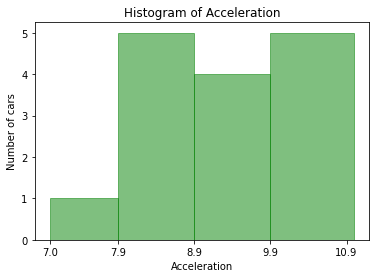

In [189]:
#Please note that below histogram is made with matplotlib library

#First lets make the eddges for bins w.r.t x reuired values exaple first bin starting from 7 to 7.9
bin_edges = [7,7.9,8.9,9.9,11]

acc_hist = suv["Acceleration (0-60) Sec"].plot(kind = "hist", facecolor='g',alpha=0.5,bins = bin_edges,edgecolor='g')

# facecolor - is to choose color for the chart such as "r" , "y" ,"b"
# alpha - opcaticy. take svalue from 0 to 1
# bins - either give a single digit for number of bins OR  make a list of for esges of each bin.
# edgecolor -  choose a color for edges of bins such as "g" , "k", "r"


acc_hist.set_title("Histogram of Acceleration")
plt.xlabel("Acceleration")    # X xis name
plt.xticks([7,7.9,8.9,9.9,10.9])     #points for x axis
plt.ylabel("Number of cars")  # Y axis name

plt.show() # To see final plot

_____________________________________________________________________________________________________________________

## 2. Most Popular Last Names

In alphabetical order, the six most common last names
in the United States in 2018 are Brown, Garcia, Johnson, Jones, Smith, and Williams
(United States Census Bureau website). Assume that a sample of 50 individuals
with one of these last names provided the excel file.

<br>
Summarize the data by constructing the following:
<br>
a. Relative and percent frequency distributions
<br>
b. A sorted bar chart
<br>
c. A pie chart
<br>
d. Based on these data, what are the three most common last names? Which type of
chart makes this most apparent?

In [190]:
names = pd.read_excel("names2018.xlsx")
names = names.drop(["Unnamed: 1" ,"Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1) #Delete_Multiple_columns

names["Index"] = range(1,len(names)+1)

#### A. Relative and percent frequency distributions

In [191]:
#This Time we will see sorted values distributiuon 
ln_group = names.groupby("Last Name")
print(ln_group.count()["Index"].sort_values(ascending=False) ,"\n") #Sort_Groupby


#For the second part of the problem. Lets write a function to produce relative frequncies.
print("Relative Frequency")
def rel_freq(x):   #Lets create a functiomn for the relative frequency.
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs

x = list(names["Last Name"])
rel_freq(x)

Last Name
Smith       12
Johnson     10
Williams     8
Brown        7
Jones        7
Garcia       6
Name: Index, dtype: int64 

Relative Frequency


[('Jones', 0.14),
 ('Johnson', 0.2),
 ('Garcia', 0.12),
 ('Brown', 0.14),
 ('Smith', 0.24),
 ('Williams', 0.16)]

#### B . Sorted Bar chart 

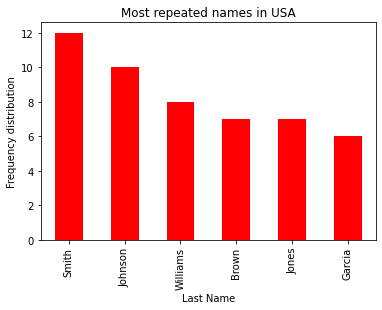

In [192]:
ln_group = names.groupby("Last Name")

#Making SORTED Bar chart

ln_bar = ln_group.count()["Index"].sort_values(ascending= False).plot(kind = "bar", facecolor='r' ) #Sorted_Bar_Chart
plt.ylabel("Frequency distribution")
plt.title("Most repeated names in USA")
plt.show()

#### C. Create Pie chart

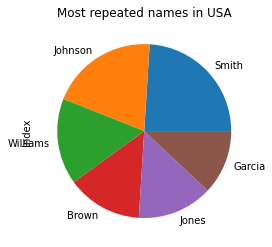

In [193]:
ln_bar = ln_group.count()["Index"].sort_values(ascending= False).plot(kind = "pie", ) 
plt.title("Most repeated names in USA")
plt.show()


#### E.  Based on these data, what are the three most common last names? Which type of chart makes this most apparent?

In [194]:
#From Sorted bar charts can say that Smith and Jhinson are the most common last names

____________________________________________________________________________________________________________________

## 3. NBA Player Rating

CBSSports.com developed the Total Player Ratings system
to rate players in the National Basketball Association (NBA) based upon various
offensive and defensive statistics. The following data show the average number of
points scored per game (PPG) for 50 players with the highest ratings for a portion of
an NBA season (CBSSports.com website).

Use classes starting at 10 and ending at 30 in increments of 2 for PPG in the
following.
<br>
a. Show the frequency distribution.
<br>
b. Show the relative frequency distribution.
<br>
c. Show the cumulative percent frequency distribution.
<br>
d. Develop a histogram for the average number of points scored per game.
<br>
e. Do the data appear to be skewed? Explain.
<br>
f. What percentage of the players averaged at least 20 points per game?

In [118]:
nba = pd.read_excel("NBAPlayerPts.xlsx")
nba.head()

,Rank,Player,PPG
0,1,"LeBron James, MIA",27.0
1,2,"Kevin Durant, OKC",28.8
2,3,"James Harden, HOU",26.4
3,4,"Kobe Bryant, LAL",27.1
4,5,"Russell Westbrook, OKC",22.9


#### A. Show the frequency distribution of PPG

In [287]:
#First Lets make a list contatining PPG classes, and then add into our data frame as new column.

z = []
for i in nba["PPG"]:
    if i >= 10 and i <12:
        z.append("10-12")
    elif i >=12 and i <14:
        z.append("12-14")
    elif i >=14 and i <16:
        z.append("14-16")
    elif i >=16 and i <18:
        z.append("16-18")
    elif i >=18 and i <20:
        z.append("18-20")       
    elif i >=20 and i <22:
        z.append("20-22")
    elif i >=22 and i <24:
        z.append("22-24")
    elif i>= 24 and i <26:
        z.append("24-26")
    elif i >=26 and i <28:
        z.append("26-28")
    elif i >=28 and i <30:
        z.append("28-30")
    else:
        pass
nba["PPG_Class"] = z   #Add_column_in_dataframe

#Frequency distributioin:
print("Method 1 Output:")
print(nba["PPG_Class"].value_counts())


Method 1 Output:
16-18    19
18-20     9
14-16     7
20-22     4
26-28     3
12-14     3
22-24     2
28-30     2
10-12     1
Name: PPG_Class, dtype: int64


#### B. Show the relative frequency distribution.

In [259]:
nba["PPG_Class"].value_counts(normalize=True).sort_index()

10-12    0.02
12-14    0.06
14-16    0.14
16-18    0.38
18-20    0.18
20-22    0.08
22-24    0.04
26-28    0.06
28-30    0.04
Name: PPG_Class, dtype: float64

#### C. Show the cumulative percent frequency distribution

In [279]:
print("Cummulative percent Frerquency:", "\n")
print((nba["PPG_Class"].value_counts(normalize=True).sort_index().cumsum())*100)

Cummulative percent Frerquency: 

10-12      2.0
12-14      8.0
14-16     22.0
16-18     60.0
18-20     78.0
20-22     86.0
22-24     90.0
26-28     96.0
28-30    100.0
Name: PPG_Class, dtype: float64


#### D. Develop a histogram for the average number of points scored per game

Method 1 Output:


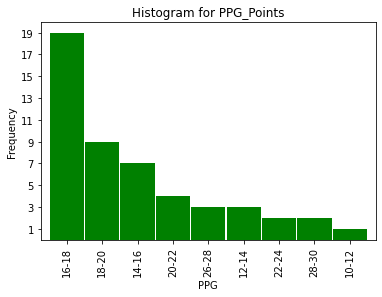

Method 2 Output:


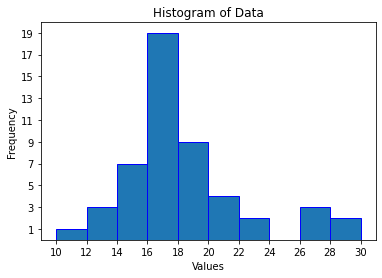

In [289]:
#lETS Show distribution  by manipluating barplot into hisogram(by increasing width of bars)
ppg_bar = nba["PPG_Class"].value_counts().plot(kind = "bar",width=0.97,facecolor = "g")
ppg_bar.set_title("Histogram for PPG_Points")
plt.xlabel("PPG")
plt.ylabel("Frequency")
plt.yticks(list(range(1,21,2)))
print("Method 1 Output:")
plt.show()

#OR


#
#First lets just make a regular Histogram
edges = list(range(10,31,2))
ppg_hist = nba["PPG"].sort_values(ascending= False).sort_values().plot(kind = "hist",bins = edges,edgecolor='b')
ppg_hist.set_title("Histogram of Data")
plt.xlabel("Values")    # X xis name
plt.xticks(list(range(10,31,2)))    #points for x axis
plt.yticks(list(range(1,20,2)))    #points for x axis
plt.ylabel("Frequency")  # Y axis name
print("Method 2 Output:")
plt.show() #To see final plot



#### E. Do the data appear to be skewed? Explain.

In [290]:
#Yes, the data appeared to be aksewed at right.

#### F. What percentage of the players averaged at least 20 points per game?

In [304]:
print((nba["PPG"]>20).value_counts()/nba.shape[0])

print("Answer is 22 %")

False    0.78
True     0.22
Name: PPG, dtype: float64
Answer is 22 %


___________________________________________________________________________________________________________________

## 4. Revenue of World’s Most Valuable Brands

Each year Forbes ranks the world’s most
valuable brands. A portion of the data for 82 of the brands in the 2013 Forbes list is
excel data (Forbes website). The data set includes the following variables:
<br>

Prepare a crosstabulation of the data on Industry (rows) and Brand Value (billions). Use
classes of 0–10, 10–20, 20–30, 30–40, 40–50, and 50–60 for Brand Value (billions).



In [429]:
brand = pd.read_excel("BrandValue.xlsx")
brand.head()

,Brand,Industry,Brand Value ($ billions),1-Yr Value Change (%),Brand Revenue ($ billions)
0,Accenture,Other,9.7,10,30.4
1,Adidas,Other,8.4,23,14.5
2,Allianz,Financial Services,6.9,5,130.8
3,Amazon.Com,Technology,14.7,44,60.6
4,American Express,Financial Services,18.0,5,33.8


#### Prepare a crosstabulation of the data on Industry (rows) and Brand Revenue

In [571]:
#Lets first add class intervals for Brand_Value column in our data frame
z = []
for i in brand["Brand Value ($ billions)"]:
    if 0<=i<10:
        z.append("0-10")
    elif 10<=i<20:
        z.append("10-20")
    elif 20<=i<30:
        z.append("20-30") 
    elif 30<=i<40:
        z.append("30-40") 
    elif 40<=i<50:
        z.append("40-50")
    elif 50<=i<60:
        z.append("50-60") 
    else:
        pass

        
brand["cl_bv"] = z #Ass class_of_brandValue into data frame

#Crosstab Industry vs Brand Value(shows counts)
pd.crosstab(brand["Industry "],brand["cl_bv"])  #Simple_crosstab
pd.crosstab(brand["Industry "],brand["cl_bv"], margins=True)  #Marginal_crosstab
pd.crosstab(brand["Industry "],brand["cl_bv"], normalize=True)  #MFrequency_crosstab
pd.crosstab(brand["Industry "],brand["cl_bv"], normalize="index")  #row_percentage_crosstab
pd.crosstab(brand["Industry "],brand["cl_bv"], normalize="columns")  #column_percentage_crosstab

pd.crosstab(brand["Industry "],brand["cl_bv"]) 

cl_bv,0-10,10-20,20-30,30-40,40-50,50-60
Industry,,,,,,
Automotive & Luxury,10,4,1,0,0,0
Consumer Packaged Goods,7,5,0,0,0,0
Financial Services,11,3,0,0,0,0
Other,14,10,0,2,0,0
Technology,7,4,0,1,1,2


__________________________________________________________________________________________________________________

## 5. Low Temperatures and Snowfall

The file Snow contains temperature and snowfall
data for 51 major U.S. cities over 30 years. For example, the average low temperature
for Columbus, Ohio, is 44 degrees and the average annual snowfall is 27.5 inches.
<br>

a. Construct a scatter diagram with the average annual low temperature on the horizontal
axis and the average annual snowfall on the vertical axis.
<br>
b. Does there appear to be any relationship between these two variables?
<br>
c. Based on the scatter diagram, comment on any data points that seem to be unusual.

In [4]:
snow = pd.read_excel("snow.xlsx")
snow.head()

,City,State,Average Low temp,Average Snowfall
0,Atlanta,Georgia,53,2.9
1,Austin,Texas,59,0.6
2,Baltimore,Maryland,45,20.2
3,Birmingham,Alabama,53,1.6
4,Boston,Massachusetts,44,43.8


#### A. Construct a scatter diagram with the average annual low temperature on the horizontal axis and the average annual snowfall on the vertical axis.

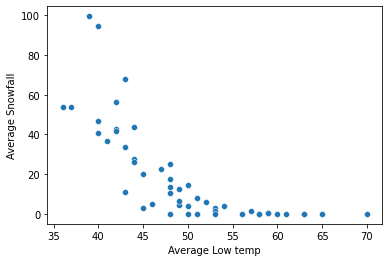

In [17]:
sns.scatterplot(data=snow,x="Average Low temp", y="Average Snowfall")
plt.show()

#### B. Does there appear to be any relationship between these two variables?

In [59]:
#Yes The relation between appear to be Negative in scatter plot

#### C. Based on the scatter diagram, comment on any data points that seem to be unusual.

In [60]:
#Surprising At 40 Temp values, We see more snow that at 35. 
#The reason is Two cities have an average snowfall of nearly 100inches: Buffalo, New York and Rochester New York
#both are located near large lakes in NewYork

________________________________________________________________________________________________________________________

## 6. Smartphone Ownership

Consider the following survey results that show smartphone ownership by age.
<br>

a. Construct a stacked bar chart to display the above survey data on type of mobile
phone ownership. Use age category as the variable on the horizontal axis.
<br>
b. Comment on the relationship between age and smartphone ownership.
<br>
c. How would you expect the results of this survey to be different if conducted
10 years from now?

In [63]:
sp = pd.read_excel("SmartPhones.xlsx")
sp = sp.drop(["Unnamed: 4","Unnamed: 5","Unnamed: 6","Unnamed: 7","Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11","Unnamed: 12","Unnamed: 13"], axis=1)
sp.head()

,Age,Smartphone,Other Cell,No Cell Phone
0,18-24,0.49,0.46,0.05
1,25-34,0.58,0.35,0.07
2,35-44,0.44,0.45,0.11
3,45-54,0.28,0.58,0.14
4,55-64,0.22,0.59,0.19


#### A. Construct a stacked bar chart to display the above survey data on type of mobile phone ownership. Use age category as the variable on the horizontal axis.

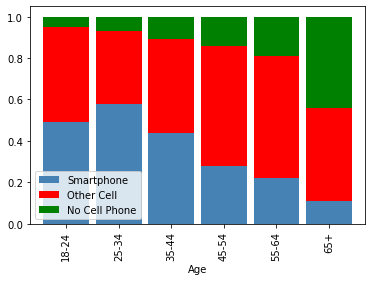

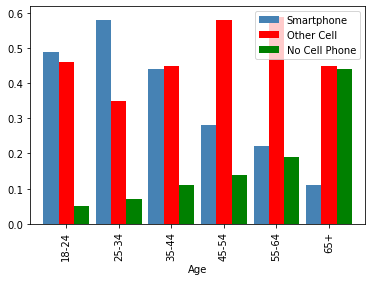

In [50]:
sp.set_index('Age').plot(kind='bar', stacked = True,color=['steelblue', 'red',"g"],width=0.87) #Stacked_Bar_Chart
sp.set_index('Age').plot(kind='bar' ,color=['steelblue', 'red',"g"],width=0.87) #SidebySide_Bar_Chart
plt.show()

#### B. Comment on the relationship between age and smartphone ownership.

In [51]:
#We can observe that as the age goesup, the use of smartphones is is declining.

#### C. How would you expect the results of this survey to be different if conducted 10 years from now?

In [58]:
#Unless a newe device replaces the smartphone,we would expect smartphone ownership would become less sensitive to age 
#this would be true because current users will become older and the device will be seen as a necessity than a luxury.

_____________________________________________________________________________________________________________________